In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

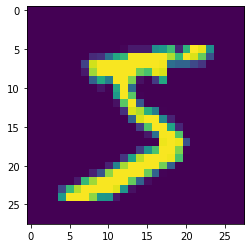

In [ ]:
plt.imshow(X_train[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


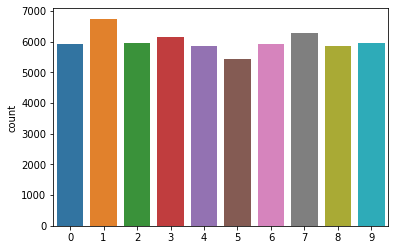

In [ ]:
sns.countplot(y_train)

Normalization

In [ ]:
X_train=X_train/255
X_test=X_test/255

Reshaping

In [ ]:
X_train=X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

Converting to One Hot Encoding

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)

In [ ]:
y_train.shape

(60000, 10)

Splitting Train and Validation Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(54000, 28, 28, 1)
(54000, 10)
(6000, 28, 28, 1)
(6000, 10)


Applying CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

Using Data Augmentation 

In [ ]:
dataaug=ImageDataGenerator( 
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False
) 

In [ ]:
dataaug.fit(X_train)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history1=model.fit_generator(dataaug.flow(X_train,y_train),steps_per_epoch=108,epochs=10,validation_data=(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
108/108 [==============================] - 5s 43ms/step - loss: 0.2571 - accuracy: 0.9204 - val_loss: 0.0964 - val_accuracy: 0.9693
Epoch 2/10
108/108 [==============================] - 4s 41ms/step - loss: 0.2166 - accuracy: 0.9335 - val_loss: 0.0905 - val_accuracy: 0.9710
Epoch 3/10
108/108 [==============================] - 5s 42ms/step - loss: 0.1935 - accuracy: 0.9406 - val_loss: 0.0794 - val_accuracy: 0.9742
Epoch 4/10
108/108 [==============================] - 5s 42ms/step - loss: 0.1864 - accuracy: 0.9379 - val_loss: 0.0699 - val_accuracy: 0.9758
Epoch 5/10
108/108 [==============================] - 5s 42ms/step - loss: 0.2013 - accuracy: 0.9363 - val_loss: 0.0721 - val_accuracy: 0.9783
Epoch 6/10
108/108 [==============================] - 4s 42ms/step - loss: 0.2012 - accuracy: 0.9403 - val_loss: 0.0659 - val_accuracy: 0.9790
Epoch 7/10
108/108 [==============================] - 4s 41ms/step - loss: 0.1725 - accuracy: 0.9496 - val_loss: 0.0668 - val_accuracy: 0.9782

Visualization of Results

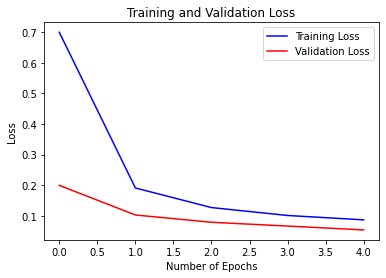

In [ ]:
plt.plot(history.history['loss'],color='b',label='Training Loss')
plt.plot(history.history['val_loss'],color='r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

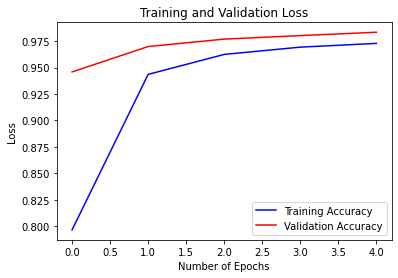

In [ ]:
plt.plot(history.history['accuracy'],color='b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_val)
y_pred_num=np.argmax(y_pred,axis=1)
y_correct=np.argmax(y_val,axis=1)
cm=confusion_matrix(y_correct,y_pred_num)
print(cm)

[[601   0   1   0   0   0   1   0   0   2]
 [  0 681   2   3   1   0   0   1   0   0]
 [  1   0 576   4   0   0   0   3   2   0]
 [  0   2   4 571   0   1   0   2   3   0]
 [  0   0   1   0 557   0   0   0   0   7]
 [  0   0   0   2   0 509   3   0   3   1]
 [  1   1   0   0   2   6 617   0   4   0]
 [  0   0   4   2   0   0   0 612   2   5]
 [  3   0   0   1   1   2   1   0 573   3]
 [  0   0   0   1   5   3   0   4   4 598]]


Text(87.0, 0.5, 'True Digit')

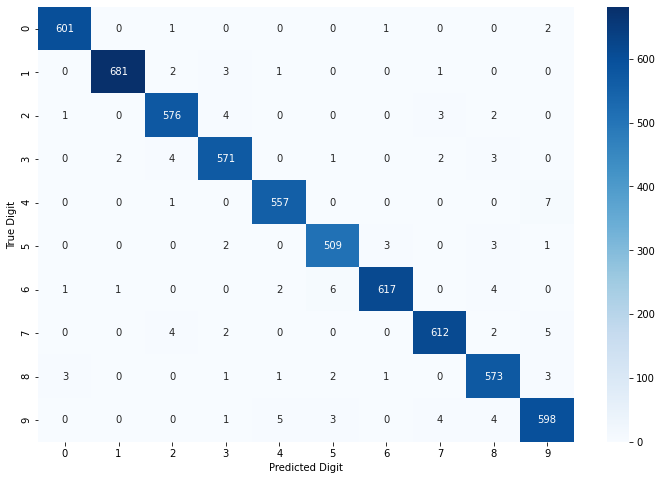

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')